# IMPORT THE DEPENDENCIES

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score



# DATA COLLECTION AND ANALYSIS

In [2]:
df = pd.read_csv('merged_dataset.csv')

# Basic statistics of the dataset
print(df.describe())

       MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   295.000000    295.000000    295.000000      295.000000   
mean    164.943555    208.704473    126.830593        0.009871   
std      46.691989     92.552445     51.557492        0.054066   
min      88.333000    102.145000     65.476000       -0.199640   
25%     120.079000    138.475086     88.027500        0.003005   
50%     156.239000    202.450000    107.802000        0.005190   
75%     201.944675    240.763665    163.866000        0.013150   
max     260.117440    592.205062    239.175904        0.262378   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        295.000000  295.000000  295.000000  295.000000    295.000000   
mean          -0.011848    0.004418    0.000471    0.005965      0.014031   
std            0.051890    0.046226    0.048999    0.054177      0.065781   
min           -0.251498   -0.172702   -0.211714   -0.160408     -0.246441   
25%            0.000

In [3]:
# number of rows and columns in the dataframe
df.shape

(295, 24)

In [4]:
# getting more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              295 non-null    object 
 1   MDVP:Fo(Hz)       295 non-null    float64
 2   MDVP:Fhi(Hz)      295 non-null    float64
 3   MDVP:Flo(Hz)      295 non-null    float64
 4   MDVP:Jitter(%)    295 non-null    float64
 5   MDVP:Jitter(Abs)  295 non-null    float64
 6   MDVP:RAP          295 non-null    float64
 7   MDVP:PPQ          295 non-null    float64
 8   Jitter:DDP        295 non-null    float64
 9   MDVP:Shimmer      295 non-null    float64
 10  MDVP:Shimmer(dB)  295 non-null    float64
 11  Shimmer:APQ3      295 non-null    float64
 12  Shimmer:APQ5      295 non-null    float64
 13  MDVP:APQ          295 non-null    float64
 14  Shimmer:DDA       295 non-null    float64
 15  NHR               295 non-null    float64
 16  HNR               295 non-null    float64
 1

In [5]:
# checking for missing values in each column
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [6]:
# getting some statistical measures about the data
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,...,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000
mean,164.943555,208.704473,126.830593,0.009871,-0.011848,0.004418,0.000471,0.005965,0.014031,0.242381,...,0.043261,0.011212,22.795134,0.498305,0.493736,0.715867,-6.082598,0.206310,2.299155,0.175025
std,46.691989,92.552445,51.557492,0.054066,0.051890,0.046226,0.048999,0.054177,0.065781,0.182139,...,0.073101,0.073235,4.418847,0.500847,0.117592,0.078619,1.103468,0.105930,0.372453,0.115580
min,88.333000,102.145000,65.476000,-0.199640,-0.251498,-0.172702,-0.211714,-0.160408,-0.246441,-0.140778,...,-0.277478,-0.198765,8.441000,0.000000,0.036556,0.327848,-8.018410,-0.113119,1.423287,-0.235248
25%,120.079000,138.475086,88.027500,0.003005,0.000010,0.001270,0.001475,0.003495,0.010810,0.132500,...,0.021805,0.004580,19.538500,0.000000,0.420499,0.665329,-6.996612,0.148321,2.019672,0.110119
50%,156.239000,202.450000,107.802000,0.005190,0.000030,0.002440,0.002610,0.006960,0.019970,0.192409,...,0.038360,0.012110,23.162000,0.000000,0.489345,0.719576,-6.244178,0.210185,2.277927,0.177807
75%,201.944675,240.763665,163.866000,0.013150,0.000070,0.004795,0.004815,0.012840,0.039405,0.287756,...,0.070542,0.038495,25.529207,1.000000,0.576304,0.757752,-5.426944,0.271961,2.538126,0.244544
max,260.117440,592.205062,239.175904,0.262378,0.151307,0.159846,0.149783,0.221077,0.209636,1.302000,...,0.209233,0.314820,33.047000,1.000000,0.854788,1.055572,-2.434031,0.529259,3.671155,0.527367


In [7]:
# distribution of target Variable
df['status'].value_counts()

status
0    148
1    147
Name: count, dtype: int64

In [8]:
df['status'] = pd.to_numeric(df['status'], errors='coerce')

# Now you can apply the mean function
mean_value = df['status'].mean()

In [9]:
X = df.drop(columns=['name','status'], axis=1)
Y = df['status']
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0     202.632000    565.740000    177.258000        0.016270   
1     107.332000    113.840000    104.315000        0.002900   
2     199.382154    209.693907    191.973063        0.116101   
3     112.414658    133.337683    105.794235       -0.199640   
4     113.166000    130.270000    100.673000        0.005020   
..           ...           ...           ...             ...   
290   116.879000    131.897000    108.153000        0.007880   
291   116.225605    177.321645     96.678614       -0.163058   
292   116.225605    177.321645     96.678614       -0.163058   
293   169.774000    191.759000    151.451000        0.015680   
294   237.226000    247.326000    225.227000        0.002980   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0            0.000080  0.009190  0.009630    0.027560      0.071700   
1            0.000030  0.001440  0.001820    0.004310      0.015670   
2            0.004

In [10]:
print(Y)

0      1
1      1
2      0
3      0
4      1
      ..
290    1
291    0
292    0
293    1
294    0
Name: status, Length: 295, dtype: int64


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train)


[[ 0.78341063  0.02494406  1.29652908 ... -0.60961244 -0.04554014
  -2.50103721]
 [-0.15397871 -0.49261287  0.41408581 ... -0.26947748  0.0905148
  -0.08926532]
 [ 0.85309002  0.14230209  1.17987208 ...  0.02929162  0.17704103
   0.88403957]
 ...
 [ 1.54965816  0.38746966  1.93836714 ... -0.30939423 -1.22321736
  -0.7805015 ]
 [-1.01080935 -0.85749231 -0.33614207 ...  0.76820639 -0.77140145
   1.32077653]
 [-0.19853399  0.20885367 -0.91689266 ...  0.6712102  -0.18349252
  -0.62106233]]


# MODEL TRAINING (SVM)

In [12]:
model = svm.SVC(kernel='linear')
# training the SVM model with training data
model.fit(X_train, y_train)

SVC(kernel='linear')

In [13]:
# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.9110169491525424


In [14]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:


# accuracy score on training data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

y_pred = model.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
PRF_Micro = precision_recall_fscore_support(y_test, y_pred, average='micro')
PRF_Macro = precision_recall_fscore_support(y_test, y_pred, average='macro')


print("Precision, Recall, F1-Score (Micro)")
print("Precision:", PRF_Micro[0])
print("Recall:", PRF_Micro[1])
print("F1-Score:", PRF_Micro[2])

conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)



import warnings
warnings.filterwarnings("ignore", category=UserWarning)
'''
#input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569
input_data = input()
input_list = input_data.split(",")
input_data_as_numpy_array = np.array(input_list)

# changing input data to a numpy array
#input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = model.predict(std_data)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")'''


Accuracy score of test data :  0.847457627118644
Precision, Recall, F1-Score (Micro)
Precision: 0.847457627118644
Recall: 0.847457627118644
F1-Score: 0.847457627118644
Confusion Matrix:
[[28  4]
 [ 5 22]]


'\n#input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569\ninput_data = input()\ninput_list = input_data.split(",")\ninput_data_as_numpy_array = np.array(input_list)\n\n# changing input data to a numpy array\n#input_data_as_numpy_array = np.asarray(input_data)\n\n# reshape the numpy array\ninput_data_reshaped = input_data_as_numpy_array.reshape(1,-1)\n\n# standardize the data\nstd_data = scaler.transform(input_data_reshaped)\n\nprediction = model.predict(std_data)\nprint(prediction)\n\n\nif (prediction[0] == 0):\n  print("The Person does not have Parkinsons Disease")\n\nelse:\n  print("The Person has Parkinsons")'

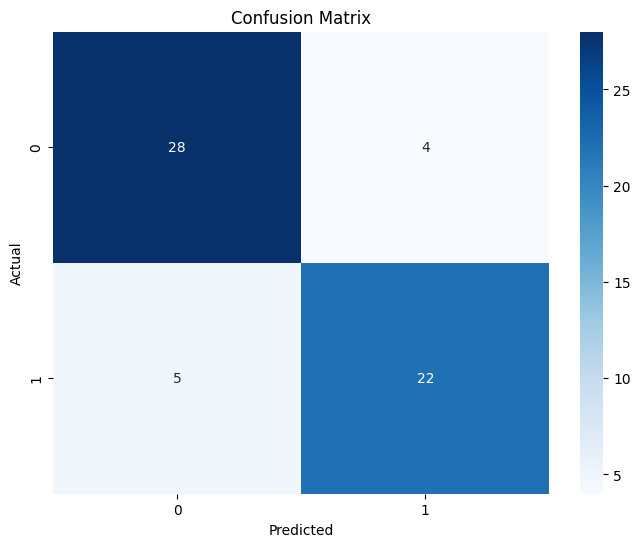

In [16]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [17]:
# import tkinter as tk
# from tkinter import filedialog



# # Function to handle model prediction
# def run_prediction():
#     input_data = entry_var.get()
#     if input_data:
#         input_list = input_data.split(",")
#         input_data_as_numpy_array = np.array(input_list)

#         # Reshape the numpy array
#         input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

#         # Standardize the data
#         std_data = scaler.transform(input_data_reshaped)

#         prediction = model.predict(std_data)

#         if prediction[0] == 0:
#             output_label.config(text="The Person does not have Parkinson's Disease")
#         else:
#             output_label.config(text="The Person has Parkinson's")
#     else:
#         output_label.config(text="Please enter data first.")


# # Create the main window
# root = tk.Tk()
# root.title("Parkinson's Disease Prediction")

# # Input label and entry field
# input_label = tk.Label(root, text="Enter data (comma-separated):")
# input_label.pack()
# entry_var = tk.StringVar()
# input_entry = tk.Entry(root, textvariable=entry_var)
# input_entry.pack()

# # Predict button
# predict_button = tk.Button(root, text="Predict", command=run_prediction)
# predict_button.pack()

# # Output label for displaying prediction result
# output_label = tk.Label(root, text="")
# output_label.pack()

# root.mainloop()


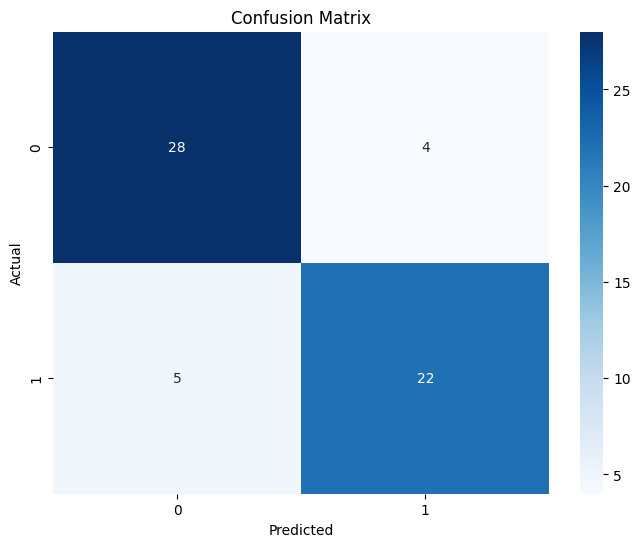

In [18]:
import tkinter as tk
import re
from tkinter import filedialog
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Function to handle model prediction
# Function to handle model prediction
def run_prediction():
    input_data = entry_var.get()
    if input_data:
        # Split the input data based on both commas and newlines
        input_list = [float(value) for value in re.split(r',|\n', input_data) if value.strip()]
        input_data_as_numpy_array = np.array(input_list)

        # Reshape the numpy array
        input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

        # Standardize the data
        std_data = scaler.transform(input_data_reshaped)

        prediction = model.predict(std_data)

        if prediction[0] == 0:
            output_label.config(text="The Person does not have Parkinson's Disease")
        else:
            output_label.config(text="The Person has Parkinson's")

        # Plot confusion matrix in GUI
        plot_confusion_matrix()

    else:
        output_label.config(text="Please enter data first.")



# Function to plot the confusion matrix
def plot_confusion_matrix():
    # Assuming you have the `conf_matrix` variable available
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1], ax=ax)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    # Embed the plot into Tkinter window
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas_widget = canvas.get_tk_widget()
    canvas_widget.pack()


# Create the main window
root = tk.Tk()
root.title("Parkinson's Disease Prediction")

# Input label and entry field
input_label = tk.Label(root, text="Enter data (comma-separated):")
input_label.pack()
entry_var = tk.StringVar()
input_entry = tk.Entry(root, textvariable=entry_var)
input_entry.pack()

# Predict button
predict_button = tk.Button(root, text="Predict", command=run_prediction)
predict_button.pack()

# Output label for displaying prediction result
output_label = tk.Label(root, text="")
output_label.pack()

root.mainloop()
